In [1]:
% matplotlib inline
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.grid_search import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt

def plot_matrix(clf, X_test, y_test):
    """Plot Confussion Matrix from a given classifier"""
    plt.clf()
    plt.imshow(confusion_matrix(y_test, clf.predict(X_test)),
               interpolation='nearest', cmap=plt.cm.binary)
    plt.colorbar()
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    plt.show()

def get_n_comp_expl_var(variance):
    """Returns PCA components needed to explain given percentage of variance"""
    for i in range(100):
        pca = PCA(n_components=i)
        pca.fit(X)
        suma = pca.explained_variance_ratio_.sum()
        if suma >= variance:
            return i, pca


In [2]:
df = pd.read_csv('../TP5/data/train.csv')

X = df.ix[:,1:-1].values
y = df['target']

le = preprocessing.LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.25)

#### Establecemos un baseline con un DummyClassifier (performance pobre)

             precision    recall  f1-score   support

          0       0.00      0.00      0.00       478
          1       0.26      1.00      0.42      4098
          2       0.00      0.00      0.00      1988
          3       0.00      0.00      0.00       673
          4       0.00      0.00      0.00       663
          5       0.00      0.00      0.00      3464
          6       0.00      0.00      0.00       650
          7       0.00      0.00      0.00      2197
          8       0.00      0.00      0.00      1259

avg / total       0.07      0.26      0.11     15470

0.264899806076


/home/bruno/.virtualenvs/dss/lib/python2.7/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


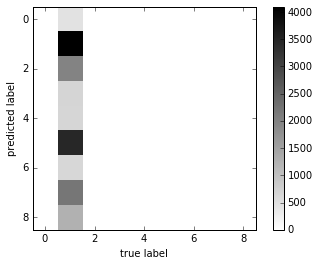

In [3]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='most_frequent',random_state=0).fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)
print classification_report(y_test, y_pred_dummy)
print dummy.score(X_test, y_test)
plot_matrix(dummy, X_test, y_test)

#### Probamos un Árbol (ETC) sin personalizar parámetros

In [4]:
etc_1 = ExtraTreesClassifier(n_estimators=100, max_features=0.2, n_jobs=2)
etc_1.fit(X_train, y_train)
y_pred_etc_1 = etc_1.predict(X_test) 

             precision    recall  f1-score   support

          0       0.80      0.42      0.55       478
          1       0.73      0.89      0.80      4098
          2       0.64      0.51      0.57      1988
          3       0.86      0.50      0.63       673
          4       0.97      0.96      0.96       663
          5       0.93      0.95      0.94      3464
          6       0.79      0.58      0.67       650
          7       0.88      0.94      0.91      2197
          8       0.88      0.88      0.88      1259

avg / total       0.82      0.82      0.81     15470

0.818228829994


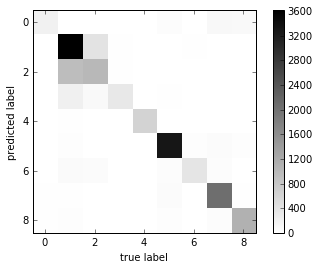

In [5]:
print classification_report(y_test, y_pred_etc_1)
print etc_1.score(X_test, y_test)
plot_matrix(etc_1, X_test, y_test)

#### Hacemos un GridSearch para buscar los mejores parámetros para nuestro clasificador

In [ ]:
parameters = {'max_features':np.arange(0.02,0.5,0.1), 'n_estimators':[100,400]}
#clf = ExtraTreesClassifier()
#clf = GridSearchCV(clf, parameters)
#clf.fit(X_train, y_train)
#print clf.best_score_
#print clf.best_params_

#### Creamos un clasificador con los parámetros indicados por el GridSearch 
#### {'max_features': 0.42000000000000004, 'n_estimators': 400}

In [6]:
#This one takes a while
etc_2 = ExtraTreesClassifier(max_features=0.42, n_estimators=400, n_jobs=2)
etc_2.fit(X_train, y_train)
y_pred_etc_2 = etc_2.predict(X_test)

             precision    recall  f1-score   support

          0       0.46      0.80      0.59       278
          1       0.88      0.74      0.80      4861
          2       0.52      0.64      0.58      1622
          3       0.53      0.85      0.65       423
          4       0.96      0.97      0.96       657
          5       0.95      0.94      0.95      3510
          6       0.63      0.78      0.70       525
          7       0.94      0.89      0.91      2317
          8       0.89      0.88      0.88      1277

avg / total       0.85      0.83      0.83     15470

0.82501616031


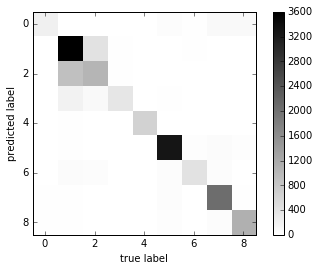

In [7]:
print classification_report(y_pred_etc_2, y_test)
print etc_2.score(X_test, y_test)
plot_matrix(etc_2, X_test, y_test)

#### Features más relevantes

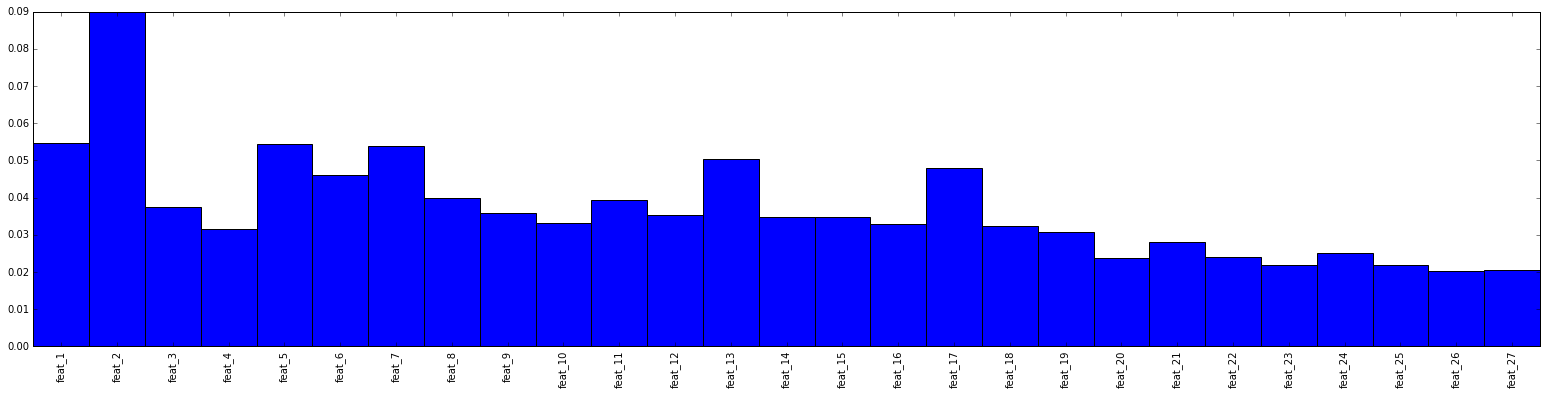

0.0898746029939 feat_2
0.0545606444167 feat_1
0.0543994179022 feat_5
0.0539211720149 feat_7
0.0503313296392 feat_13
0.0480318398893 feat_17
0.0459193968904 feat_6
0.0399755769408 feat_8
0.0392000647694 feat_11
0.0375664282101 feat_3
0.035915213671 feat_9
0.0353462593124 feat_12
0.034824083545 feat_14
0.034764875421 feat_15
0.0330965965148 feat_10
0.0328433891323 feat_16
0.0324032689937 feat_18
0.031437273753 feat_4
0.0307429615583 feat_19
0.0280446831908 feat_21
0.0249525014036 feat_24
0.023897908894 feat_22
0.0236385711199 feat_20
0.0218713487127 feat_23
0.0218329833327 feat_25
0.0204279882968 feat_27
0.0201796194813 feat_26


In [14]:
from sklearn import decomposition

n_components = 27 #con 27 componentes explicamos el 80% de la variabilidad
pca = decomposition.PCA(n_components=n_components)
pca.fit(X)
X_pca = pca.transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_pca, y_encoded, test_size=0.25)

etc_3 = ExtraTreesClassifier(max_features=0.42, n_estimators=400, n_jobs=2)
etc_3.fit(X_train, y_train)
y_pred_etc_3 = etc_3.predict(X_test)

importances = etc_3.feature_importances_

text = map(lambda i: df.columns[1:-1][i], range(n_components))
plt.figure(figsize=(n_components, 6))
plt.bar(range(n_components), height=importances,  width=1.)
plt.xticks(np.arange(0.5, n_components, 1.), text, rotation=90)
plt.xlim((0, n_components))
plt.show()

indices = np.argsort(importances)[::-1]
for i in range(n_components):
    print importances[indices[i]], df.columns[1:-1][indices[i]]

#### Nos quedamos con las que explican el 80% de la variabilidad para analizarlas mejor

In [15]:
new_X_idx = []
for i in range(n_components):
    new_X_idx.append(df.columns[1:-1][indices[i]])

new_X = df[new_X_idx]
print new_X.columns

Index([u'feat_2', u'feat_1', u'feat_5', u'feat_7', u'feat_13', u'feat_17',
       u'feat_6', u'feat_8', u'feat_11', u'feat_3', u'feat_9', u'feat_12',
       u'feat_14', u'feat_15', u'feat_10', u'feat_16', u'feat_18', u'feat_4',
       u'feat_19', u'feat_21', u'feat_24', u'feat_22', u'feat_20', u'feat_23',
       u'feat_25', u'feat_27', u'feat_26'],
      dtype='object')


#### Estandarizamos y normalizamos los datos

In [16]:
X_scaler = preprocessing.MinMaxScaler()
#y_scaler = preprocessing.StandardScaler()

new_X_scaled = X_scaler.fit_transform(new_X.values.astype(np.float32))
#new_y_scaled = y_scaler.fit_transform(y_encoded)

#### Dividimos nuevamente los datos

In [17]:
X_train, X_test, y_train, y_test = train_test_split(new_X_scaled, y_encoded.astype(np.int32), test_size=0.25)

#### Creamos un nuevo Clasificador (usando los parametros de GridSearch)

In [ ]:
etc_4 = ExtraTreesClassifier(max_features=0.42, n_estimators=400, n_jobs=2)
etc_4.fit(X_train, y_train)
y_pred_etc_4 = etc_4.predict(X_test)

#### Analizamos su performance

In [ ]:
print classification_report(y_pred_etc_4, y_test)
print etc_4.score(X_test, y_test)
plot_matrix(etc_4, X_test, y_test)